# Homework 2: Random Walks

# Part I

## Question 1: Plot the average and RMS displacement (total length of walk) for an ensemble of one-dimensional (1D) random walks each of which have Nsteps = 100 and a constant stepsize. How many random walks do you need to simulate until you get a "good" measurement of the RMS displacement? How have you defined "good"?

In [88]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt

# define the number of steps 
nsteps      = 10000         # "Full" simulation
nsteps_test = 100            # "Fast" simulation

# Function to construct a random array of steps
def randomSteps(N,d):
    '''
    This function returns the steps generated using random
    number generators, possibly choosing among a list of options
    given as an argument.
    '''
    
    steps = np.empty([N, d])
    steps = np.random.randint(0,2,(N,d)) * 2 - 1  

    return steps
   
# Function to build a random walk out of the array of steps    
def buildRandomWalk(nsteps, dim):
    '''
    If you take this approach, you will want to pass the options 
    from the above steps function in order to construct the correct
    walk.
    '''
    
    # Get the steps
    steps = randomSteps(nsteps, dim)
    
    # Build the walk
    walk = np.cumsum(steps, axis=0)
    
    return walk

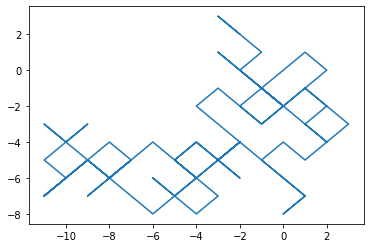

In [89]:
#Random walk visual example for 2d random walk
walk=buildRandomWalk(nsteps_test,2)

x = walk[:,0]  # slicing to extract the 0 column on the first axis
y = walk[:,1]  # slicing to extract the 1 column on the first axis
    
plt.plot(x,y)

Average [-0.352]
RMS [312.53799769]


Text(0, 0.5, 'RMS')

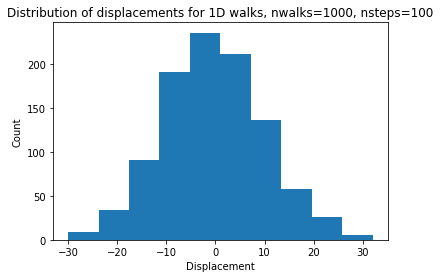

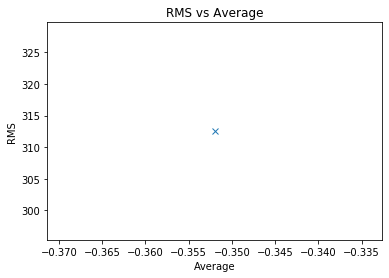

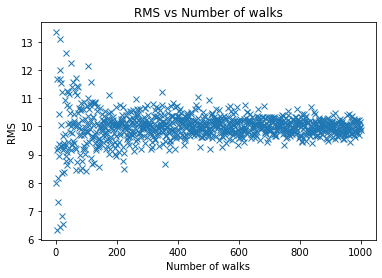

In [121]:
nsteps=100
def evaluatehist(nsteps, iterations): #where iterations is number of walks

    walks=[]

    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,1))

    sum=0
    rms=0
    last=[]
    #For every walk, adds the displacement to an array called last, adds to sum and adds the square of displacement to rms
    for j in range(iterations):
        last.append(walks[j][-1]) #walks[j][-1] is the total displacement from origin since walks was cumulatively summed over
        sum+=walks[j][-1]
        rms+=(walks[j][-1])**2

    average=sum/iterations
    rms=np.sqrt(rms)

    last=np.asarray(last)

    #histogram of displacement values
    plt.figure()
    plt.hist(last,bins=10)
    plt.title("Distribution of displacements for 1D walks, nwalks=%d, nsteps=%d" %(iterations,nsteps))
    plt.xlabel("Displacement")
    plt.ylabel("Count")

    #plotting rms value vs average value
    plt.figure()
    plt.plot(average,rms,'x')
    plt.title("RMS vs Average")
    plt.xlabel("Average")
    plt.ylabel("RMS")
    
    print("Average", average)
    print("RMS", rms)
    
    return last

def getRMS(nsteps, iterations):
    walks=[]

    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,1))

    sum=0
    rms=0
    last=[]
    #For every walk, adds the displacement to an array called last, adds to sum and adds the square of displacement to rms
    for j in range(iterations):
        last.append(walks[j][-1]) #walks[j][-1] is the total displacement from origin since walks was cumulatively summed over
        sum+=walks[j][-1]
        rms+=(walks[j][-1])**2

    average=sum/iterations
    rms=np.sqrt(rms/iterations)

    return rms

last=evaluatehist(nsteps,1000) #nsteps and 100 walks

rms=[]
for i in range(1,1001):
    rms.append(getRMS(nsteps, i))

plt.figure()
rms=np.asarray(rms)
plt.plot(range(1,1001),rms, 'x')
plt.title("RMS vs Number of walks")
plt.xlabel("Number of walks")
plt.ylabel("RMS")

After 600 number of walks, the RMS value seems to stabilize sufficiently. The more walks you do the better the estimate, but at least 600 seems to be a good estimate. 

## Question 2: Overlay the mean and RMS displacements for random walks of Nsteps = 10^3, 10^4, and 10^6 on top of the one from the previous question.

Average [1.166]
RMS [32.31773507]
Average [2.778]
RMS [101.80772073]
Average [-15.41]
RMS [1002.69712476]


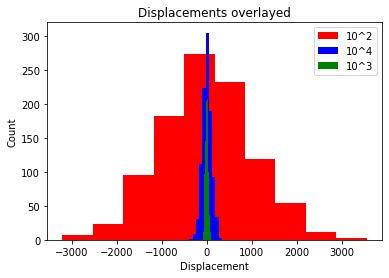

In [122]:
def evaluate(nsteps, iterations):

    walks=[]

    #build walks 
    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,1))


    sum=0
    rms=0
    last=[]
    #save displacement squared to rms value, add displacement to sum value and save last displacement for every walk
    for j in range(iterations):
        last.append(walks[j][-1])
        sum+=walks[j][-1]
        rms+=(walks[j][-1])**2

    average=sum/iterations
    rms=np.sqrt(rms/iterations)

    last=np.asarray(last)
    
    print("Average", average)
    print("RMS", rms)
    
    return last

#save distributions for different nsteps
last3=evaluate(1000,1000)
last4=evaluate(10000,1000)
last6=evaluate(1000000,1000)


#plot histograms of displacements
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(last6, label='$n=10^6$',color='red')
ax.hist(last4, label='$n=10^4$',color='blue')
ax.hist(last3, label='$n=10^3$',color='green')
ax.set_xlabel("Displacement")
ax.set_ylabel("Count")
ax.set_title("Displacements overlayed")
leg=('10^2','10^4','10^3')
ax.legend(leg)

Here I overlayed the distribution of displacements for nsteps=10^2, 10^4, 10^6.

## Question 3: Take two particles that are undergoing a 1D random walk and allow them each to undergo random walks of a fixed number of Nsteps = N with fixed length, as above. As a function of N determine the fraction of random walks where the two particles both end their walks at the origin (i.e. their total displacement is exactly equal to zero).

Pseudocode:

<bd>Save two random walks for one for each particle with nsteps
    
<bd>If both walks return 0 as their last add to count
    
<bd>count/number of walks is fraction
    
<bd>iterate 100
    
<bd>return fraction

<bd>save fraction 

Text(0, 0.5, 'Fraction')

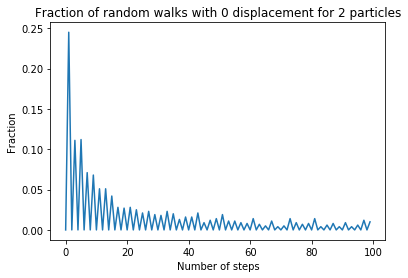

In [123]:
#similar to previous displacement functions
def displacement(nsteps, iterations):

    walks=[]
    #build walks
    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,1))


    sum=0
    rms=0
    displacement=[]
    #saving relevant data from each walk
    for j in range(iterations):
        displacement.append(walks[j][-1])
        sum+=walks[j][-1]
        rms+=(walks[j][-1])**2

    average=sum/iterations
    rms=np.sqrt(rms/iterations)

    displacement=np.asarray(displacement)
    
    return displacement



#calculate displacement for two particles n=iterations times, 
#iterate through array of displacements for both particles
#if any have 0 displacement for both particles, add to count
def zerodisplcount(nsteps,iterations):

    #array of last positions for particle1 and particle 2
    last1=displacement(nsteps, iterations)
    last2=displacement(nsteps, iterations)
    count=0

    for i in range(iterations):
        if last1[i]==last2[i]==0:
            count+=1
            
    return count/iterations
    
   
nstepsarray=[]

#calculate fraction of walks where both particles end at the origin for differetn number of steps (here 1 to 100), 
#where number of walks is 1000
for i in range(100):
    nstepsarray.append(zerodisplcount(i+1,1000))

plt.plot(range(100),nstepsarray)
plt.title("Fraction of random walks with 0 displacement for 2 particles")
plt.xlabel("Number of steps")
plt.ylabel("Fraction")
    



# Part II

## Question 1: Plot the average and RMS displacement (total length of walk) for an ensemble of two-dimensional (2D) random walks each of which have Nsteps = 100 and a constant stepsize. How many random walks do you need to simulate until you get a "good" measurement of the RMS displacement in 2D?

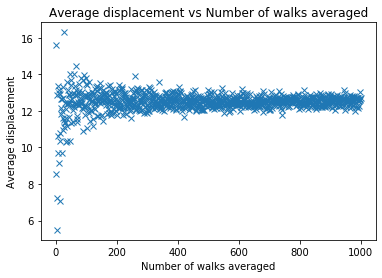

Text(0, 0.5, 'RMS displacement value')

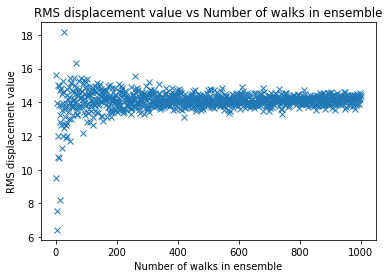

In [120]:
#max number of walks for an ensemble
maxe=1000

def evaluate2d(nsteps, iterations):

    walks=[]
    #build walks
    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,2))

    sum=0
    rms=0
    lastx=[]
    lasty=[]
    displarr=[] #displacement array
    
    #save relevant values from each walk
    for j in range(iterations):
        lastx.append(walks[j][-1][0])
        lasty.append(walks[j][-1][1])
        d=np.sqrt(walks[j][-1][0]**2+walks[j][-1][1]**2) #calculating displacement for one iteration
        sum+=d
        rms=rms+(d**2)
        displarr.append(d)
        

    average=sum/iterations
    rms=np.sqrt(rms/iterations)
    lastx=np.asarray(lastx)
    lasty=np.asarray(lasty)
    
    return average, rms


average=np.zeros(maxe)
rms=np.zeros(maxe)

#calculating average and rms for 100 walks each with 100 steps
for i in range(maxe):
    average[i],rms[i]=evaluate2d(100,i+1)

#plotting number of walks averaged vs average for walks with nsteps=100
plt.plot(range(1,maxe+1),average,'x')
plt.title("Average displacement vs Number of walks averaged")
plt.xlabel("Number of walks averaged")
plt.ylabel("Average displacement")
plt.show()

#plotting number of walks used to calculate rms vs rms for walks with nsteps=100

plt.plot(range(1,maxe+1),rms,'x')
plt.title("RMS displacement value vs Number of walks in ensemble")
plt.xlabel("Number of walks in ensemble")
plt.ylabel("RMS displacement value")

To simulate a "good" measurement of the RMS value in 2D, ideally I think you would need at least 200 walks. We the RMS value start to stabilize around 14 after 200. A better estimate is after 400 walks. 

## Question 2: Measure the distribution of the magnitudes of the total displacement (i.e. the endpoints) of the random walks in 2D with a number of steps Nsteps = 10^y and y = 0, 1, 2, 4, 6.

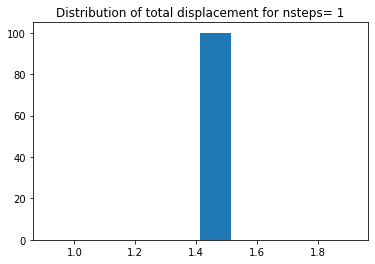

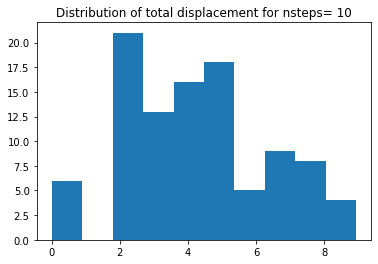

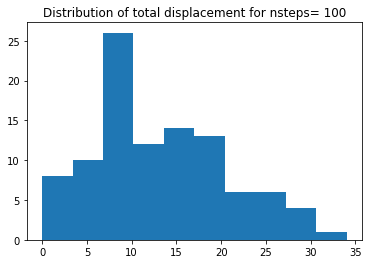

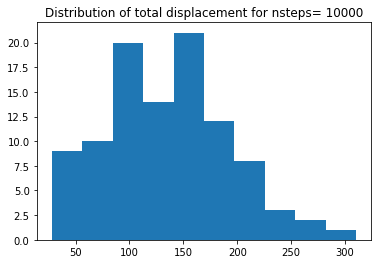

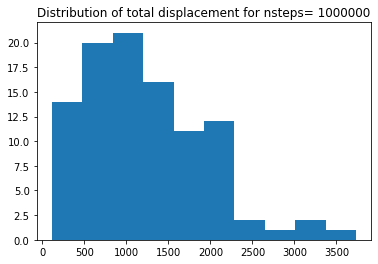

In [124]:
def evaluatedist2D(nsteps, iterations):

    walks=[]

    #print(buildRandomWalk(nsteps_test,1))

    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,2))

    sum=0
    rms=0
    lastx=[]
    lasty=[]
    displarr=[] #displacement array
    for j in range(iterations):
        lastx.append(walks[j][-1][0])
        lasty.append(walks[j][-1][1])
        d=np.sqrt(walks[j][-1][0]**2+walks[j][-1][1]**2) #calculating displacement for one iteration
        sum+=d
        rms=rms+(d**2)
        displarr.append(d)
        

    average=sum/iterations
    rms=np.sqrt(rms/iterations)
    lastx=np.asarray(lastx)
    lasty=np.asarray(lasty)

    
    #histogram of displacement values
    plt.figure()
    plt.hist(displarr,bins=10)
    plt.title('Distribution of total displacement for nsteps= %d' %nsteps)
    
    return 

evaluatedist2D(1,100)
evaluatedist2D(10,100)
evaluatedist2D(100,100)
evaluatedist2D(10000,100)
evaluatedist2D(1000000,100)



## Question 3: Produce a scatter plot of the endpoints of 10000 random walks with Nsteps = 1, 10, superimposed on the same plot with large Nsteps (and justify what large means)

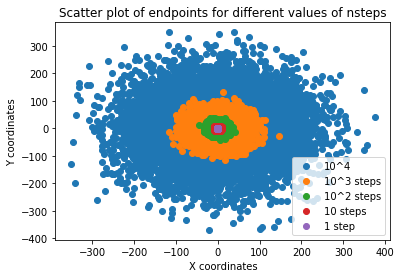

In [125]:
def evaluateLastPos(nsteps, iterations):

    walks=[]

    #print(buildRandomWalk(nsteps_test,1))

    for i in range(iterations):
        walks.append(buildRandomWalk(nsteps,2))

    sum=0
    rms=0
    lastx=[]
    lasty=[]
    displarr=[] #displacement array
    for j in range(iterations):
        lastx.append(walks[j][-1][0])
        lasty.append(walks[j][-1][1])
        d=np.sqrt(walks[j][-1][0]**2+walks[j][-1][1]**2) #calculating displacement for one iteration
        sum+=d
        rms=rms+(d**2)
        displarr.append(d)
        

    average=sum/iterations
    rms=np.sqrt(rms/iterations)
    lastx=np.asarray(lastx)
    lasty=np.asarray(lasty)
    return lastx, lasty

x, y=evaluateLastPos(10000,10000)
plt.scatter(x,y)

x, y=evaluateLastPos(1000,10000)
plt.scatter(x,y)

x, y=evaluateLastPos(100,10000)
plt.scatter(x,y)

x, y=evaluateLastPos(10,10000)
plt.scatter(x,y)

x, y=evaluateLastPos(1,10000)
plt.scatter(x,y)

plt.title("Scatter plot of endpoints for different values of nsteps")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
leg='10^4','10^3 steps','10^2 steps','10 steps','1 step'
plt.legend(leg)



Large means when it takes more than a couple seconds to compile. We could also consider large to be the number of steps needed to get a gaussian distribution of displacements. From question 2 we see that even for 10^6 there is a decent amount of skew to the right. I haven't included anything bigger than 10^4 here because of run time. 

## Question 4: Write a routine that plots a histogram of the endpoints of W 2D random walks with Nsteps steps and 50 bins, along with the prediction given by a normal, or Gaussian, distribution for x in (−3sigma, 3sigma), where sigma=sqrt(Nsteps)xL (where L is the fixed length of each step).

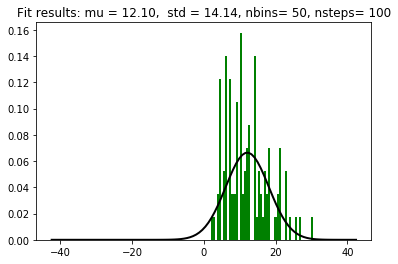

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

def evaluatehist2D(nwalks, nsteps, nbins):
    walks=[]

    for i in range(nwalks):
        walks.append(buildRandomWalk(nsteps,2))

    sum=0
    rms=0
    lastx=[]
    lasty=[]
    displarr=[] #displacement array
    for j in range(nwalks):
        lastx.append(walks[j][-1][0])
        lasty.append(walks[j][-1][1])
        d=np.sqrt(walks[j][-1][0]**2+walks[j][-1][1]**2) #calculating displacement for one iteration
        sum+=d
        rms=rms+(d**2)
        displarr.append(d)
        

    average=sum/nwalks
    rms=np.sqrt(rms/nwalks)
    lastx=np.asarray(lastx)
    lasty=np.asarray(lasty)


    #histogram of displacement values
    plt.title('Distribution of total displacement for nsteps= %d over nwalks=%d' %(nsteps,nwalks))
    
    #overlay gaussian
    mu, std = norm.fit(displarr) #returns parameter estimates for generic data.
    sigma = np.sqrt(nsteps)*np.sqrt(2) #suggested sigma calculation
    bin_values, bin_edges, patches = plt.hist(displarr,bins=nbins, density=True, color='green') #plotting the histogram such that it is normalized (density=True)
    x = np.linspace((-3)*sigma, 3*sigma, 100) #x ranging from -3sigma to 3sigma
    p = norm.pdf(x, mu, std) #generating gaussian distribution
    plt.plot(x, p, 'k', linewidth=2) #plotting gaussian distribution
    title = "Fit results: mu = %.2f,  std = %.2f, nbins= %d, nsteps= %d" % (mu, sigma, nbins, nsteps)
    plt.title(title)
    plt.show()
    
    return bin_values, bin_edges, p
              
              
              
bin_values, bin_edges, p=evaluatehist2D(100,100,50)
    

I used the norm.fit() function from the scipy.stats library. This function gives parameter estimates for generic data. The values of mu and sigma that are returned seem to fit the data better than the suggested sigma=sqrt.(nsteps)*L (where L is the length of step). For "endpoints" in the question, I interpreted this as displacement. I could see this being interpreted as the physical coordinates for the last position. In that case I would imagine doign two histograms one with the x location and one with the y location. I have chosen to use the displacement interpretation as this consolidates the data into one graph.

## Question 5: Do a histogram with W = 10000 and N = 1, 2, 3, 5. How quickly does the Gaussian distribution become a good approximation to the random walk? How are you quanitfying "good"?

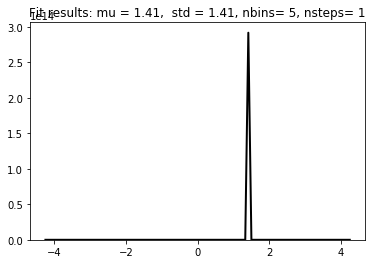

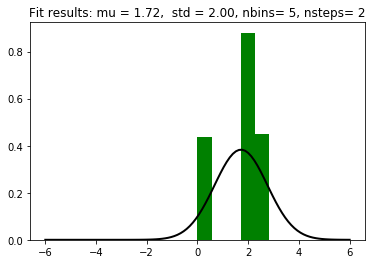

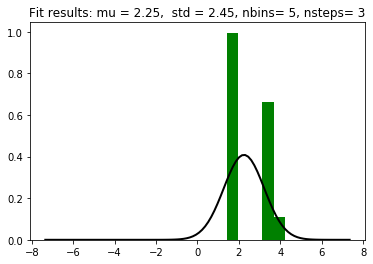

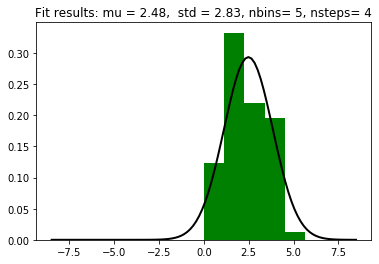

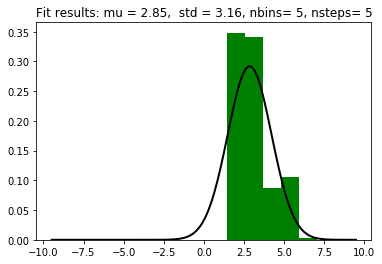

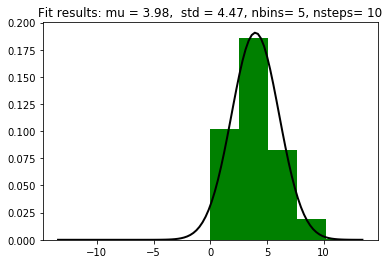

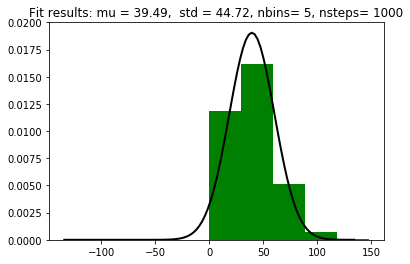

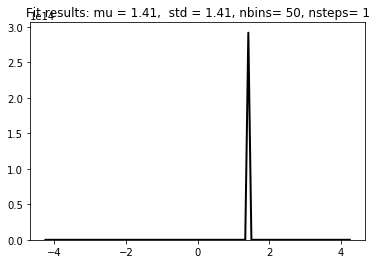

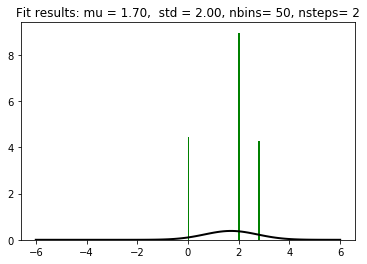

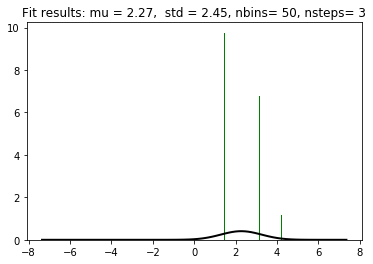

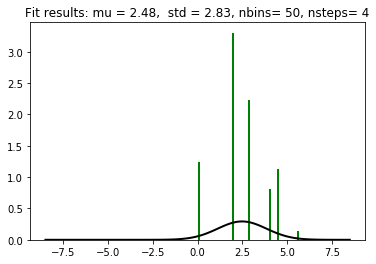

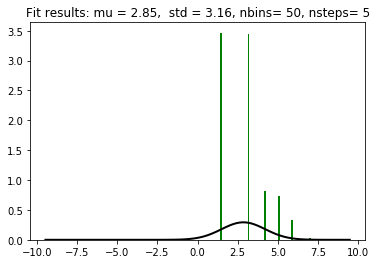

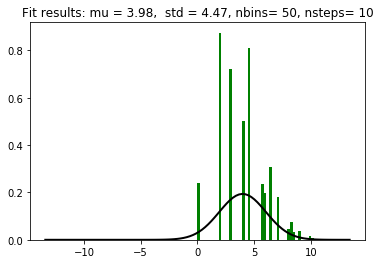

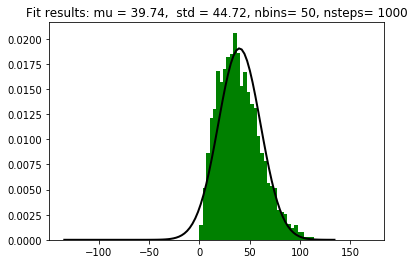

(array([1.45730103e-03, 5.17490570e-03, 8.62484284e-03, 1.21640025e-02,
        1.30562276e-02, 1.68333139e-02, 1.57031621e-02, 1.70117590e-02,
        1.82013925e-02, 1.85285417e-02, 2.06104003e-02, 1.85582825e-02,
        1.53165312e-02, 1.66846098e-02, 1.46919737e-02, 1.35320810e-02,
        1.31157093e-02, 1.03200706e-02, 8.59510200e-03, 7.82184023e-03,
        5.68049994e-03, 5.38309156e-03, 5.17490570e-03, 3.00382457e-03,
        2.73615704e-03, 2.52797118e-03, 1.57626438e-03, 1.15989266e-03,
        1.42756019e-03, 7.73261772e-04, 7.43520934e-04, 2.37926699e-04,
        2.97408374e-04, 2.67667536e-04, 1.18963349e-04, 8.92225121e-05,
        2.97408374e-05, 5.94816747e-05, 2.97408374e-05, 2.97408374e-05,
        2.97408374e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.97408374e-05]),
 array([  0.        ,   3.36238011,   6.72476022,  10.08714033,
         13.44952044,  16.8119

In [128]:
nbins=5
evaluatehist2D(10000,1,nbins)
evaluatehist2D(10000,2,nbins)
evaluatehist2D(10000,3,nbins)
evaluatehist2D(10000,4,nbins)
evaluatehist2D(10000,5,nbins)
evaluatehist2D(10000,10,nbins)
evaluatehist2D(10000,1000,nbins)

nbins=50
evaluatehist2D(10000,1,nbins)
evaluatehist2D(10000,2,nbins)
evaluatehist2D(10000,3,nbins)
evaluatehist2D(10000,4,nbins)
evaluatehist2D(10000,5,nbins)
evaluatehist2D(10000,10,nbins)
evaluatehist2D(10000,1000,nbins)


I have plotted histograms with both 5 bins and 50 bins. With 5 bins, the data starts to fit the Gaussian at around 10 steps. Strangely, with 1000 steps and 5 bins we see a less ideal fit than with 10 steps. With 50 bins, We start to see the data just beginning to fit the Gaussian at 100 steps. At 1000 steps with 50 bins, the Gaussian distribution is a good approximation. I am quantifying "good" approximation by how filled the Gaussian distribution is by the histogram data. 

## Question 6: Compare your measurement to the expectation given by the Gaussian and compute a chi-squared. Assess how well your measurement matches the expectation.


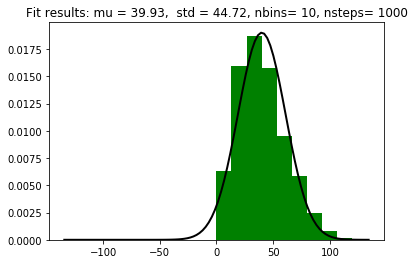

0.0755411127288315


In [98]:
def my_uniform_chisq(bin_values, bin_expectations):
    num_bins = len(bin_values)
    chi_square = sum( ( ((bin_values[i] - bin_expectations[i])**2) / bin_values[i] ) for i in range(num_bins))
    return(chi_square)


nwalks  = 10000                                         
nbins = 10
nsteps=1000

bin_values, bin_edges, bin_expectations = evaluatehist2D(nwalks,nsteps,nbins)   #  bin_expectations = norm.pdf(x, mu, std)

chisq = my_uniform_chisq(bin_values,bin_expectations)

print(chisq)


To calculate the bin_expectations I used the norm.pdf() function. The chi-squared value is approximately 0.07. This is a very small chi-squared meaning the probability of obtaining this data randomly is very high. 